In [64]:
from pycocotools.coco import COCO
import os
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
!pip install sentence_transformers
from torchvision import transforms
from sentence_transformers import SentenceTransformer
from PIL import Image
from transformers import GPT2Tokenizer, GPT2LMHeadModel, pipeline, set_seed


drive.mount('/content/drive')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


loading annotations into memory...
Done (t=9.67s)
creating index...
index created!
loading annotations into memory...
Done (t=0.88s)
creating index...
index created!
{'license': 4, 'file_name': 'COCO_val2014_000000134815.jpg', 'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000134815.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-14 21:53:20', 'flickr_url': 'http://farm8.staticflickr.com/7230/7233396616_87cd0afb30_z.jpg', 'id': 134815}
http://images.cocodataset.org/val2014/COCO_val2014_000000134815.jpg
A kitchen that has wooden cabinets and lots of pots and pans.
A kitchen with an island with built in burners init.
A kitchen scene complete with an oven, stove and bottles.
A beautiful kitchen with food cooking on the stove
A kitchen counter topped with a stove top and pots of cooking food.


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


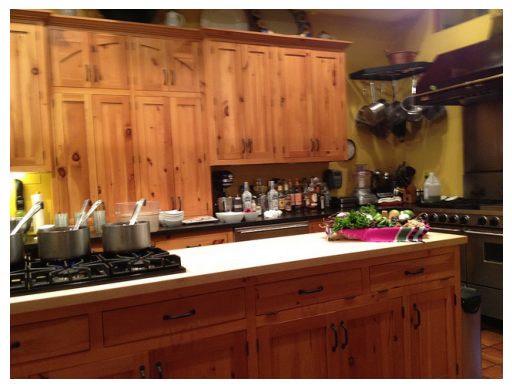

In [41]:


data_dir = "/content/drive/MyDrive/Colab Notebooks/test/"
data_type = "val2014"
instances_ann_file = os.path.join(
    data_dir, f"instances_{data_type}.json"
)
coco = COCO(instances_ann_file)

# initialize COCO API for caption annotations
captions_ann_file = os.path.join(data_dir,  f"captions_{data_type}.json")
coco_caps = COCO(captions_ann_file)

# get image ids
ids = list(coco.anns.keys())


# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]["image_id"]
img = coco.loadImgs(img_id)[0]
url = img["coco_url"]

print(img)
# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis("off")
plt.imshow(I)

# load and display captions
ann_ids = coco_caps.getAnnIds(imgIds=img["id"])
anns = coco_caps.loadAnns(ann_ids)
coco_caps.showAnns(anns)

model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg11', pretrained=True)




plt.show()

In [42]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(Image.fromarray(I))
input_batch = input_tensor.unsqueeze(0)
model.classifier[6] = nn.Linear(in_features=4096, out_features=384, bias=True)
print(model)

with torch.no_grad():
    output = model(input_batch)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [43]:
print(output)

tensor([[ 3.3471e-02, -8.1590e-02,  3.5414e-01, -7.1378e-02,  3.0978e-01,
         -7.6438e-01, -5.5425e-01, -1.0955e+00,  6.0121e-01, -1.6469e-01,
          3.0290e-01, -7.3052e-02, -6.6078e-01, -3.3211e-02, -6.6789e-01,
          5.9137e-01, -3.3497e-01,  1.6773e-01,  6.1087e-01, -1.0628e+00,
          4.4078e-01, -2.2021e-01,  2.4693e-02, -4.2779e-01,  9.9377e-02,
         -4.3486e-03,  1.3207e-01,  4.7044e-01,  9.2860e-01,  1.0835e-01,
         -3.6893e-01, -7.1247e-02,  4.6649e-01,  2.9305e-01, -2.7747e-01,
         -1.3790e-01,  8.1958e-01, -9.0860e-02, -3.5085e-01, -1.0548e+00,
          2.8968e-01,  4.8724e-01, -8.0228e-01, -5.6733e-01, -8.7352e-02,
         -7.8883e-01,  1.4822e-01, -2.1170e-01, -4.5439e-01, -5.1149e-01,
         -5.0927e-01,  7.6751e-01,  1.3628e-01,  8.5298e-02,  4.4432e-01,
         -9.0014e-01,  6.4532e-02,  1.1772e-01, -5.0672e-01,  5.2947e-01,
          1.0840e+00, -4.5642e-01,  3.2030e-01, -4.1364e-01, -1.0113e-01,
          3.3275e-01,  7.6313e-01,  1.

In [74]:
model_name = 'gpt2'  # or 'gpt2-medium', 'gpt2-large', etc.
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
input_text = "Hello my name is"
input_ids = tokenizer.encode(input_text, return_tensors='pt')
output = model.generate(input_ids)
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [73]:
print(generated_text)


Hello my name is John. I am a retired Army Ranger from the United States Army. I am
